In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
%matplotlib inline


Hypothesis:

 Yellow cab company has the higher profit according to the years.

Yellow cab company has the most profit.
How the genders distribute according to cab companies

Card as a payment method is mostly used.

New York is the city that the companies get the most profit.

Pink cab company customers mostly use cards.

Profit increases each year for both companies.

As KM travelled increases , price charged also increases.

There ıs dıfference between card or cash payıng on profıt. 

There is difference between genders for profit in both companies.

There is difference between ages for profit in both companies.



In [3]:
import pandas as pd

url_data = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')

Cab_Data= pd.read_csv(url_data)

Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
Cab_Data.info

<bound method DataFrame.info of         Transaction ID  Date of Travel  ... Price Charged Cost of Trip
0             10000011           42377  ...        370.95     313.6350
1             10000012           42375  ...        358.52     334.8540
2             10000013           42371  ...        125.20      97.6320
3             10000014           42376  ...        377.40     351.6020
4             10000015           42372  ...        114.62      97.7760
...                ...             ...  ...           ...          ...
359387        10440101           43108  ...         69.24      63.3600
359388        10440104           43104  ...        113.75     106.8480
359389        10440105           43105  ...        437.07     349.6500
359390        10440106           43105  ...        146.19     114.0480
359391        10440107           43102  ...        191.58     177.6192

[359392 rows x 7 columns]>

In [5]:
url_data2 = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')

City= pd.read_csv(url_data2)

City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
City.dtypes

City          object
Population    object
Users         object
dtype: object

In [7]:
City['Population'] = [x.replace(',','') for x in City['Population']]
City['Users'] = [x.replace(',','') for x in City['Users']]
City['Population'] = City['Population'].astype(float)
City['Users'] = City['Users'].astype(float)
City.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [8]:
url_data3 = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')

Customer_ID= pd.read_csv(url_data3)

Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
Customer_ID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [10]:

url_data4 = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

Transaction_ID= pd.read_csv(url_data4)

Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
numberofrows_1, numberofcolumns_1 = Transaction_ID.shape
print("There are {} rows and {} columns".format(numberofrows_1, numberofcolumns_1)+" in our Transaction_ID Dataset.")

There are 440098 rows and 3 columns in our Transaction_ID Dataset.


In [12]:
numberofrows_2, numberofcolumns_2 = City.shape
print("There are {} rows and {} columns".format(numberofrows_2, numberofcolumns_2)+" in our City Dataset.")

There are 20 rows and 3 columns in our City Dataset.


In [13]:
numberofrows_3, numberofcolumns_3 = Customer_ID.shape
print("There are {} rows and {} columns".format(numberofrows_3, numberofcolumns_3)+" in our Customer_ID Dataset.")

There are 49171 rows and 4 columns in our Customer_ID Dataset.


In [14]:
numberofrows_4, numberofcolumns_4 = Cab_Data.shape
print("There are {} rows and {} columns".format(numberofrows_4, numberofcolumns_4)+" in our Cab_Data Dataset.")

There are 359392 rows and 7 columns in our Cab_Data Dataset.


In [15]:
result_merged= pd.merge(left=Transaction_ID, right=Customer_ID, left_on='Customer ID', right_on='Customer ID')
result_merged.head(10)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
5,10324737,27703,Cash,Male,27,9237
6,10395626,27703,Card,Male,27,9237
7,10000013,28712,Cash,Male,53,11242
8,10079404,28712,Card,Male,53,11242
9,10186994,28712,Card,Male,53,11242


In [16]:
result= pd.merge(left=Transaction_ID, right=Cab_Data , left_on='Transaction ID', right_on='Transaction ID')
result.head(10)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,27318,Cash,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,33788,Card,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,34106,Card,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,59799,Cash,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,57982,Cash,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [17]:
result_all= pd.merge(left=result, right=result_merged, left_on='Transaction ID', right_on='Transaction ID')
result_all.head(10)

,Transaction ID,Customer ID_x,Payment_Mode_x,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID_y,Payment_Mode_y,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536
5,10000016,27318,Cash,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash,Male,25,13984
6,10000017,33788,Card,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card,Male,23,23788
7,10000018,34106,Card,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card,Male,19,19980
8,10000019,59799,Cash,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash,Male,33,19271
9,10000020,57982,Cash,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash,Male,57,5068


**DATA** **CLEANING**

In [18]:
from datetime import datetime, timedelta

In [19]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [20]:
result_all['Date of Travel']=result_all['Date of Travel'].apply(lambda x:to_date_format(x))


In [21]:
result_all=result_all.sort_values(by=['Date of Travel'])
result_all=result_all.reset_index(drop= True )

In [22]:
result_all.head(10)

,Transaction ID,Customer ID_x,Payment_Mode_x,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID_y,Payment_Mode_y,Gender,Age,Income (USD/Month)
0,10001340,52536,Card,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606
1,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,4844,Cash,Male,32,5548
2,10000635,5671,Cash,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,5671,Cash,Male,24,7081
3,10001001,2761,Card,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2761,Card,Male,40,11462
4,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,20687,Cash,Male,39,8926
5,10001009,21481,Card,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,21481,Card,Male,28,18030
6,10000605,3251,Cash,2016-01-01,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024,3251,Cash,Male,23,13077
7,10001014,47687,Card,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000,47687,Card,Male,25,16088
8,10000600,3363,Cash,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,3363,Cash,Male,31,23320
9,10000182,18418,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000,18418,Cash,Male,39,13112


In [23]:
result_all.columns

Index(['Transaction ID', 'Customer ID_x', 'Payment_Mode_x', 'Date of Travel',
       'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip',
       'Customer ID_y', 'Payment_Mode_y', 'Gender', 'Age',
       'Income (USD/Month)'],
      dtype='object')

In [24]:
result_all.isnull().sum().sum()

0

ADD THIS TO PRESENTATION


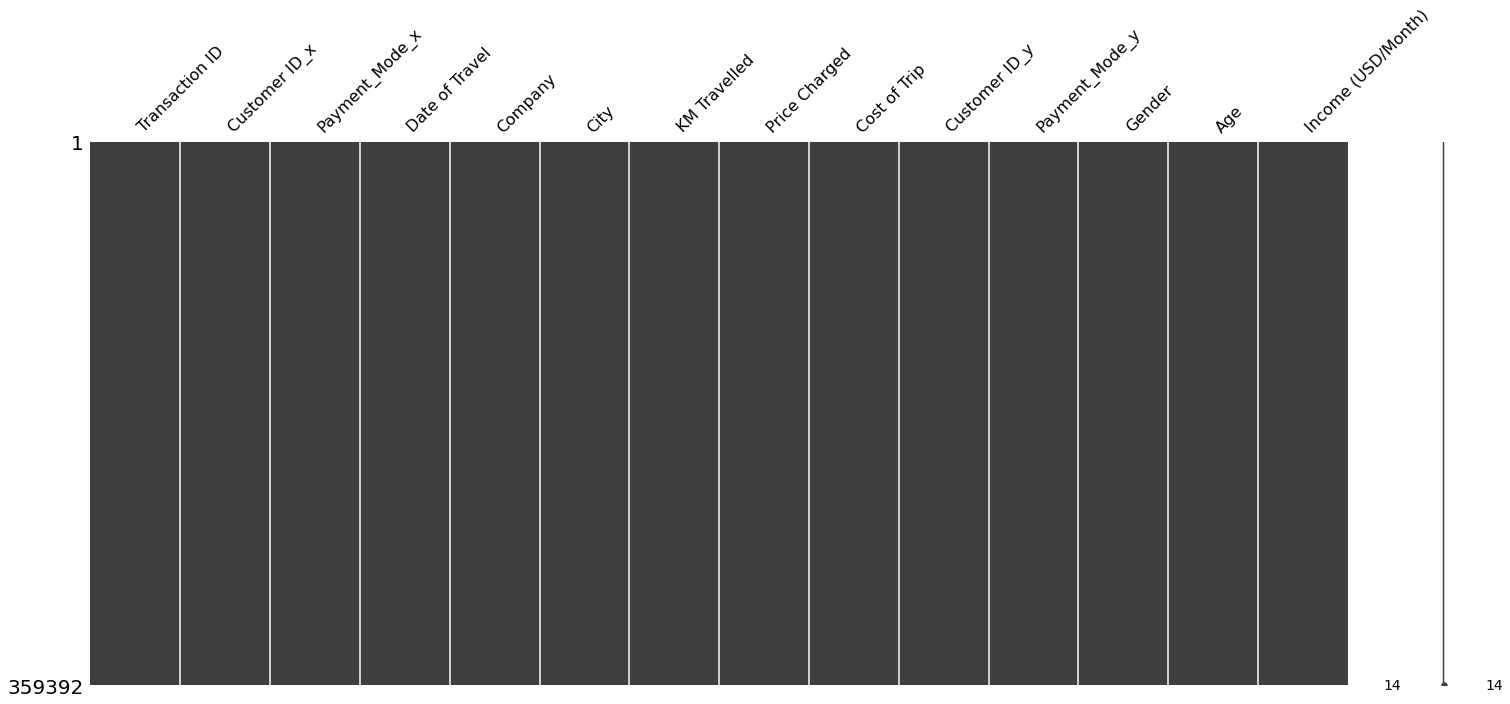

In [25]:
import missingno as msno
%matplotlib inline
msno.matrix(result_all)

No missing attributes in our datasets.

In [26]:
print('\nNumber of missing values by columns :') 
result_all.isnull().sum()


Number of missing values by columns :


Transaction ID        0
Customer ID_x         0
Payment_Mode_x        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID_y         0
Payment_Mode_y        0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [27]:
result_all.drop(["Payment_Mode_y", "Customer ID_y"],axis=1,inplace=True)
result_all .head(2)

,Transaction ID,Customer ID_x,Payment_Mode_x,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10001340,52536,Card,2016-01-01,Yellow Cab,WASHINGTON DC,10.2,202.54,135.864,Male,24,10606
1,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.6,374.66,209.664,Male,32,5548


In [28]:
result_all.rename(columns={"Customer ID_x":"Customer ID","Payment_Mode_x":"Payment Mode"}, inplace=True)
result_all.head(5)

,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10001340,52536,Card,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,Male,24,10606
1,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Male,32,5548
2,10000635,5671,Cash,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,Male,24,7081
3,10001001,2761,Card,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,Male,40,11462
4,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,Male,39,8926


In [63]:
result_all.rename(columns={"Payment Mode":"Payment_Mode"}, inplace=True)
result_all.head(5)

,Transaction_ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),company,Month of Travel,Year of Travel,Profit
0,10001340,52536,Card,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,Male,24,10606,1.0,1,2016,66.6760
1,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Male,32,5548,1.0,1,2016,164.9960
2,10000635,5671,Cash,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,Male,24,7081,1.0,1,2016,195.7548
4,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,Male,39,8926,0.0,1,2016,122.0660
5,10001009,21481,Card,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,Male,28,18030,1.0,1,2016,597.3200


In [29]:
result_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 32.9+ MB


**REMOVING** **OUTLIERS**

In [30]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [31]:
drop_numerical_outliers(result_all)

In [ ]:
no spesific outliers here.

In [33]:
result_all['Company'].value_counts()

Yellow Cab    271495
Pink Cab       84702
Name: Company, dtype: int64

yellow cab useage is more common than pink cab usage.

In [34]:
result_all['KM Travelled'].value_counts()

33.60    1526
24.00    1080
22.80    1075
16.80    1065
35.70    1058
         ... 
41.07     300
42.40     296
21.84     293
39.39     290
44.84     283
Name: KM Travelled, Length: 874, dtype: int64

In [ ]:
result_all['Payment Mode'].value_counts()

Customers used card more as paymnet method.

In [ ]:
result_all['Gender'].value_counts()

Gender male is more frequent.

In [ ]:
result_all['Age'].value_counts(ascending=True)

The age for cab usage is most frequent at age 20-35,elders don't use cab as much as them.

In [ ]:
result_all['Income (USD/Month)'].value_counts()

In [ ]:
result_all['City'].value_counts()

In [ ]:
result_all['Transaction ID'].value_counts()

In [47]:
profit=result_all['Price Charged']-result_all['Cost of Trip']
result_all['Profit']= profit

In [ ]:
correlations = result_all.corr()
correlations

Proift is obviously correlated to price charged,cost of trip
 km travelled,

In [ ]:
print(correlations["Profit"])

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
result_all["company"] = ord_enc.fit_transform(result_all[["Company"]])
result_all.head(5)


,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),company
0,10001340,52536,Card,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,Male,24,10606,1.0
1,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Male,32,5548,1.0
2,10000635,5671,Cash,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,Male,24,7081,1.0
4,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,Male,39,8926,0.0
5,10001009,21481,Card,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,Male,28,18030,1.0


In [ ]:
result_all2=result_all.sample(n = 250)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

result_all.groupby(['company','Payment Mode']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

1.0 is for yellow cab ,and 0.0 is for pink cab company. Card used more than cash.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

result_all[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pinkcab[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

In [42]:
result_all.rename({'Transaction ID':'Transaction_ID'}, axis=1,inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

yellowcab[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

Usage of cab is more common in the age gap 20-40.

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=result_all, x="Gender")
plt.title("Gender plot", fontsize=10)
plt.ylabel('Frequency')
plt.xlabel('Gender')

In [ ]:
Mostly males uses cab.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

result_all.groupby(['Company','Gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Males are more common in yellow cab and there is not a significant difference between gender in pink cab.

In [38]:
result_all['Year of Travel'] = result_all['Date of Travel'].dt.year

In [37]:
result_all['Month of Travel'] = result_all['Date of Travel'].dt.month

In [43]:
result_all.head(10)

,Transaction_ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),company,Month of Travel,Year of Travel
0,10001340,52536,Card,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,Male,24,10606,1.0,1,2016
1,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Male,32,5548,1.0,1,2016
2,10000635,5671,Cash,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,Male,24,7081,1.0,1,2016
4,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,Male,39,8926,0.0,1,2016
5,10001009,21481,Card,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,Male,28,18030,1.0,1,2016
6,10000605,3251,Cash,2016-01-01,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024,Male,23,13077,1.0,1,2016
7,10001014,47687,Card,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000,Male,25,16088,1.0,1,2016
8,10000600,3363,Cash,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,Male,31,23320,1.0,1,2016
9,10000182,18418,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000,Male,39,13112,0.0,1,2016
10,10001291,53683,Card,2016-01-01,Yellow Cab,WASHINGTON DC,8.73,168.07,104.7600,Male,26,9389,1.0,1,2016


In [48]:
yellowcab= result_all[result_all.Company.isin(['Yellow Cab'])]
print(yellowcab.shape)
yellowcab.head()


(271495, 16)


,Transaction_ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),company,Month of Travel,Year of Travel,Profit
0,10001340,52536,Card,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,Male,24,10606,1.0,1,2016,66.6760
1,10000640,4844,Cash,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Male,32,5548,1.0,1,2016,164.9960
2,10000635,5671,Cash,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,Male,24,7081,1.0,1,2016,195.7548
5,10001009,21481,Card,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,Male,28,18030,1.0,1,2016,597.3200
6,10000605,3251,Cash,2016-01-01,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024,Male,23,13077,1.0,1,2016,330.3576


In [49]:
pinkcab= result_all[result_all.Company.isin(['Pink Cab'])]
print(pinkcab.shape)
pinkcab.head()

(84702, 16)


,Transaction_ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),company,Month of Travel,Year of Travel,Profit
4,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.084,Male,39,8926,0.0,1,2016,122.066
9,10000182,18418,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.600,Male,39,13112,0.0,1,2016,24.290
12,10000187,18817,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,23.80,485.21,252.280,Male,40,5038,0.0,1,2016,232.930
14,10000189,18488,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,41.76,793.63,476.064,Male,37,22441,0.0,1,2016,317.566
18,10000195,20752,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,32.30,654.50,368.220,Male,63,18683,0.0,1,2016,286.280


In [ ]:
result_all.sort_values('Year of Travel').head()

Pink cab get the most profit in 2017.

In [50]:
pinkcab_profit=pinkcab.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
pinkcab_profit.head(3)

Profit
Company  Year of Travel             
Pink Cab 2016            1735971.834
         2017            2011165.587
         2018            1551517.496

In [51]:
pinkcab_profit=pinkcab.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
pinkcab_profit.head(3)

Profit
Company  Year of Travel             
Pink Cab 2016            1735971.834
         2017            2011165.587
         2018            1551517.496

In [ ]:
pinkcab_profit.head(3)

Total profit of pink cab.

In [52]:
yellowcab_profit=yellowcab.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
yellowcab_profit.head(3)

Profit
Company    Year of Travel              
Yellow Cab 2016            1.305023e+07
           2017            1.528913e+07
           2018            1.303142e+07

Also yellow cab got the most profit in 2017.

In [53]:
yellowcab_profit['Profit'].sum(axis=0)

41370781.93799985

Yellow cab's total profit is much higher than pink cab.

## **Average profits per City**


In [ ]:
grp= yellowcab.groupby('City').Profit.sum()
grp= pd.DataFrame(grp)
grp = grp.sort_values(by='Profit', ascending= False )
grp.head()

plt.figure(figsize=(22,11))
fig= grp.Profit.plot.bar(color = 'yellow',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profit distribution according to Cities',fontsize=20)


In [ ]:
grp2= yellowcab.groupby('City').Profit.sum()
grp2= pd.DataFrame(grp2)
grp2 = grp2.sort_values(by='Profit', ascending= False )
grp2.head()

plt.figure(figsize=(22,11))
fig= grp2.Profit.plot.bar(color = 'pink',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('PinkCab Profit distribution according to Cities',fontsize=20)


In [ ]:
plt.figure(figsize=(10,9))
sns.lineplot(data=result_all, x="KM Travelled",y='Price Charged', color= 'blue')
plt.title('Cost of Trip / KM Travelled', fontsize=14)
plt.xlabel('Travelled')
plt.ylabel('Price Charged for Trip')
plt.show()

In [ ]:
sns.catplot(
    data=result_all,
    x='City',
    y='Profit',
    row='Company',
    kind='box',
    height=3, 
    aspect=10,
    color='blue');

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=pltt.index,y=pltt.values)
plt.title('Travel frequency by Month (Pink Cab)')
plt.show()


In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=pltt2.index,y=pltt2.values)
plt.title('Travel frequency by Month (Yellow Cab)')
plt.show()

In [ ]:
pltt = result_all[result_all.Company=='Pink Cab'].groupby(['Month of Travel']).company.count()
pltt

In [ ]:
pltt2 = result_all[result_all.Company=='Yellow Cab'].groupby(['Month of Travel']).company.count()
pltt2

In [ ]:
result_all.head(3)

In [56]:
# Results of profit table 
pinkcab['Profit'].sum()
yellowcab['Profit'].sum()
pinkcab.Transaction_ID.nunique()
yellowcab.Transaction_ID.nunique()
pink_prf = pinkcab['Profit'].sum() / pinkcab.Transaction_ID.nunique() 
yellow_prf = yellowcab['Profit'].sum() / yellowcab.Transaction_ID.nunique()

In [54]:
pinkcab.Transaction_ID.nunique()

84702

HYPOTHESIS IS; For yellow Cabs: There is difference in profit between genders.

In [69]:
new1= result_all[(result_all.Gender=='Female')&(result_all.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
new2 = result_all[(result_all.Gender=='Male')&(result_all.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(new1.shape[0],new2.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=new2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis ')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)


114739 156756
We accept alternate hypothesis 
P value is  1.3871297223749354e-22


There is difference between genders in profit in yellow cabs.


HYPOTHESIS IS; For Pink Cabs: There is difference in profit between genders.

In [68]:
new1= result_all[(result_all.Gender=='Female')&(result_all.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
new2 = result_all[(result_all.Gender=='Male')&(result_all.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(new1.shape[0],new2.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=new2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis ')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)


37478 47224
We accept alternate hypothesis 
P value is  0.0


There is difference between genders in profit in pink cabs.

In [ ]:
new1= result_all[(result_all.Gender=='Female')&(result_all.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
new2 = result_all[(result_all.Gender=='Male')&(result_all.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(new1.shape[0],new2.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=new2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis ')
else:
    print('We accept null hypothesis')
    
print('P value  ', p_value)


ANY DIFFERENCE IN PROFIT WHILE PAYING WITH CARD OR CASH?

In [65]:
new1= result_all[(result_all.Payment_Mode=='Card')&(result_all.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
new2 = result_all[(result_all.Gender=='Cash')&(result_all.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(new1.shape[0],new2.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=new2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis ')
else:
    print('We accept null hypothesis')
    
print('P value ', p_value)


50714 0
We accept null hypothesis
P value is  nan


In [66]:
new1= result_all[(result_all.Payment_Mode=='Card')&(result_all.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
new2 = result_all[(result_all.Gender=='Cash')&(result_all.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(new1.shape[0],new2.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=new2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis ')
else:
    print('We accept null hypothesis')
    
print('P value  ', p_value)


162899 0
We accept null hypothesis
P value is  nan


In [70]:
new1= result_all[(result_all.Age>30)&(result_all.company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
new2 = result_all[(result_all.Age<=30)&(result_all.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(new1.shape[0],new2.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=new2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis ')
else:
    print('We accept null hypothesis')
    
print('P value  ', p_value)


0 113181
We accept alternate hypothesis 
P value is  1.1339016700314598e-06


In [74]:
new1= result_all[(result_all.Age>30)&(result_all.company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
new2 = result_all[(result_all.Age<=30)&(result_all.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(new1.shape[0],new2.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=new2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis ')
else:
    print('We accept null hypothesis')
    
print('P value  ', p_value)


0 35549
We accept alternate hypothesis 
P value is  0.0


In [75]:
result_all[result_all.Age>30].groupby('Company').Profit.mean()

Company
Pink Cab       62.173791
Yellow Cab    152.577058
Name: Profit, dtype: float64

In [76]:
result_all[result_all.Age<=30].groupby('Company').Profit.mean()

Company
Pink Cab       63.085504
Yellow Cab    152.107665
Name: Profit, dtype: float64

In [77]:
result_all[result_all.Gender=='Female'].groupby('Company').Profit.mean()

Company
Pink Cab       62.127932
Yellow Cab    148.959664
Name: Profit, dtype: float64

In [78]:
result_all[result_all.Gender=='Male'].groupby('Company').Profit.mean()

Company
Pink Cab       62.896500
Yellow Cab    154.885931
Name: Profit, dtype: float64